In [6]:
# Load the pickled data
import pickle

# file_location = 'D:\\5005-Data\\tweet_combined_with_sentiment.pkl'
file_location = os.path.join(os.getcwd(), "data", "tweet_verified_221130-230418_with_sentiment.pkl")
                             
with open(file_location, 'rb') as f:
    tweets_dict = pickle.load(f)


## Line Chart

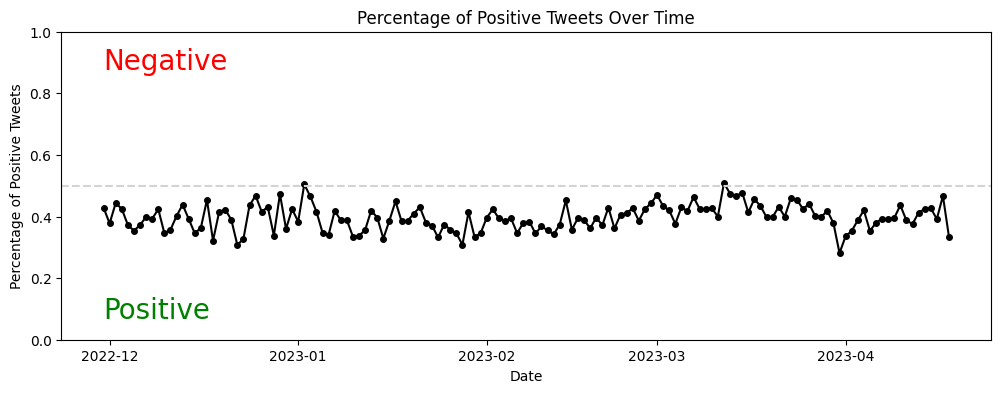

In [61]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the date range for which we want to plot the graph
start_date = datetime.strptime('2022-11-30', '%Y-%m-%d')
end_date = datetime.strptime('2023-04-18', '%Y-%m-%d')

# Initialize the lists to store the count of positive and negative tweets for each date
positive_counts = []
negative_counts = []
dates = []

# Iterate over the date range and count the positive and negative tweets for each date
current_date = start_date
while current_date <= end_date:
    positive_count = 0
    negative_count = 0
    for tweet in tweets_dict.values():
        tweet_datetime = tweet.date
        if tweet_datetime.date() == current_date.date():
            if tweet.sentiment == 'POSITIVE':
                positive_count += 1
            else:
                negative_count += 1
    
    positive_counts.append(positive_count)
    negative_counts.append(negative_count)
    dates.append(current_date.date())
    current_date += timedelta(days=1)

# Calculate the portion of positive tweets for each date
portion_positive = [p / (p + n) for p, n in zip(positive_counts, negative_counts)]

# Plot the graph
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dates, portion_positive, marker="o", markersize=4, color='black')
ax.axhline(y=0.5, color='lightgray', linestyle='--') 
ax.set_title("Percentage of Positive Tweets Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage of Positive Tweets")
ax.set_ylim(0, 1)

# Add the text labels
ax.text(dates[0], 0.05, "Positive", color='green', ha='left', va='bottom', fontsize=20)
ax.text(dates[0], 0.95, "Negative", color='red', ha='left', va='top', fontsize=20)

plt.show()

fig.savefig('positive_vs_negative_tweets_linechart.png', dpi=300, bbox_inches='tight')

## Alterative - Horizontal bar chart (likert chart style)

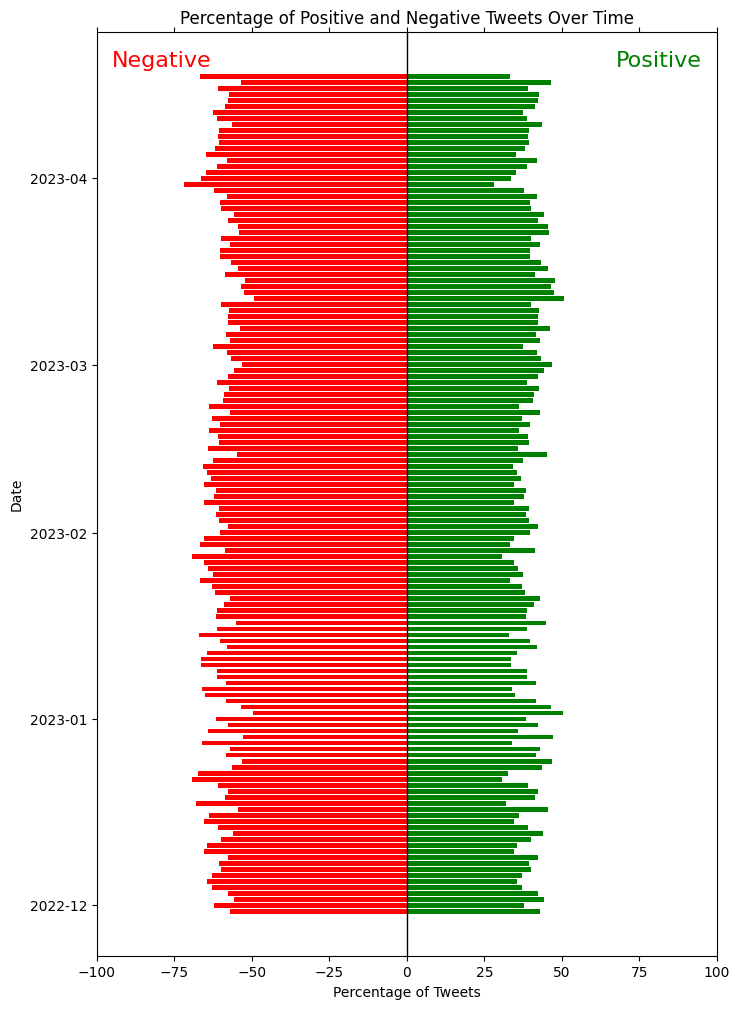

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define the date range for which we want to plot the graph
start_date = datetime.strptime('2022-11-30', '%Y-%m-%d')
end_date = datetime.strptime('2023-04-18', '%Y-%m-%d')

# Initialize the lists to store the count of positive and negative tweets for each date
positive_counts = []
negative_counts = []
dates = []

# Iterate over the date range and count the positive and negative tweets for each date
current_date = start_date
while current_date <= end_date:
    positive_count = 0
    negative_count = 0
    for tweet in tweets_dict.values():
        tweet_datetime = tweet.date
        if tweet_datetime.date() == current_date.date():
            if tweet.sentiment == 'POSITIVE':
                positive_count += 1
            else:
                negative_count += 1
    
    positive_counts.append(positive_count)
    negative_counts.append(negative_count)
    dates.append(current_date.date())
    current_date += timedelta(days=1)

# Calculate the portion of positive tweets for each date
portion_positive = [p / (p + n) for p, n in zip(positive_counts, negative_counts)]

# Calculate the positions of the bars
pos_positive = np.array(portion_positive) * 100
pos_negative = np.array([1-p for p in portion_positive]) * -100

# Create the chart
fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(dates, pos_positive, color='green')
ax.barh(dates, pos_negative, color='red')

# Set the axis labels and title
ax.set_title("Percentage of Positive and Negative Tweets Over Time")
ax.set_xlabel("Percentage of Tweets")
ax.set_ylabel("Date")

# Set the ticks on the x-axis
ax.set_xticks(np.arange(-100, 101, 25))

# Set the baseline at 0
ax.axvline(0, color='black', lw=1)

# Add text labels
ax.text(-95, end_date + timedelta(days=1), 'Negative', ha='left', va='bottom', color='red', fontsize=16)
ax.text(95, end_date + timedelta(days=1), 'Positive', ha='right', va='bottom', color='green', fontsize=16)

# Add x-axis to both top and bottom
ax.tick_params(top=True, bottom=True)

# Show the chart
plt.show()

fig.savefig('positive_vs_negative_tweets_vertical.png', dpi=300, bbox_inches='tight')

## Alterative 02 - Histogram (likert chart style)

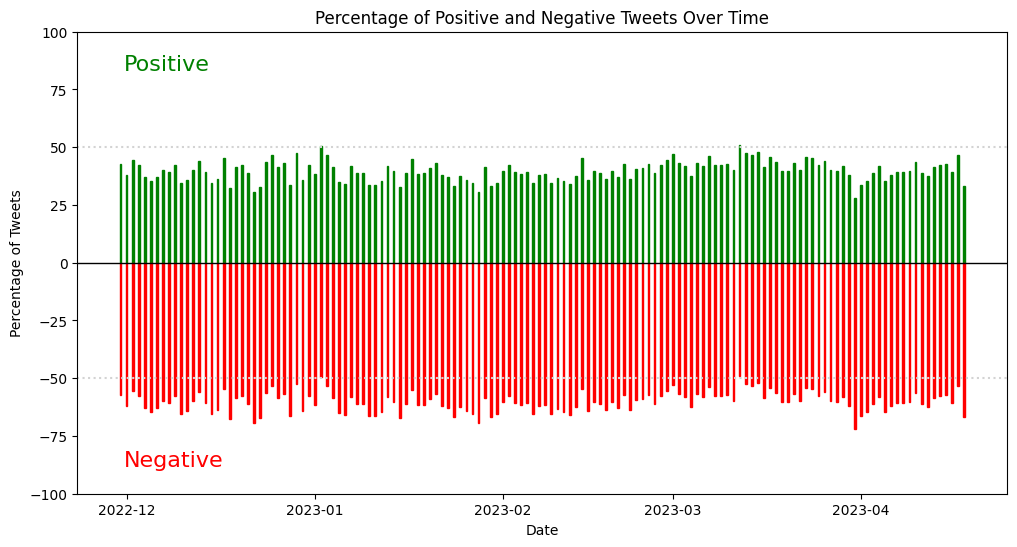

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define the date range for which we want to plot the graph
start_date = datetime.strptime('2022-11-30', '%Y-%m-%d')
end_date = datetime.strptime('2023-04-18', '%Y-%m-%d')

# Initialize the lists to store the count of positive and negative tweets for each date
positive_counts = []
negative_counts = []
dates = []

# Iterate over the date range and count the positive and negative tweets for each date
current_date = start_date
while current_date <= end_date:
    positive_count = 0
    negative_count = 0
    for tweet in tweets_dict.values():
        tweet_datetime = tweet.date
        if tweet_datetime.date() == current_date.date():
            if tweet.sentiment == 'POSITIVE':
                positive_count += 1
            else:
                negative_count += 1
    
    positive_counts.append(positive_count)
    negative_counts.append(negative_count)
    dates.append(current_date.date())
    current_date += timedelta(days=1)

# Calculate the portion of positive tweets for each date
portion_positive = [p / (p + n) for p, n in zip(positive_counts, negative_counts)]

# Create the chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.3

# Calculate the positions of the bars
pos_positive = np.array(portion_positive) * 100
pos_negative = np.array([1-p for p in portion_positive]) * -100

# Create the bars for positive and negative portions
ax.bar(dates, pos_positive, width=bar_width, color='green')
ax.bar(dates, pos_negative, width=bar_width, color='red')

# Set the axis labels and title
ax.set_title("Percentage of Positive and Negative Tweets Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage of Tweets")

# Set the ticks on the y-axis
ax.set_yticks([-100, -75, -50, -25, 0, 25, 50, 75, 100])

# Set the baseline at 0
ax.axhline(0, color='black', lw=1)

# Set the colors of the bars
ax.set_facecolor('white') # set the background color to white
for bar in ax.containers:
    if bar[0].get_height() > 0: # positive bars
        for rect in bar:
            rect.set_color('green')
    else: # negative bars
        for rect in bar:
            rect.set_color('red')

# Add 50% and -50% lines
ax.axhline(50, color='lightgrey', ls=':')
ax.axhline(-50, color='lightgrey', ls=':')

# Add the text labels
ax.text(0.05, 0.95, 'Positive', transform=ax.transAxes, ha='left', va='top', color='green', fontsize=16)
ax.text(0.05, 0.05, 'Negative', transform=ax.transAxes, ha='left', va='bottom', color='red', fontsize=16)
            
# Show the chart
plt.show()

fig.savefig('positive_vs_negative_tweets_horizontal.png', dpi=300, bbox_inches='tight')

# Draw word cloud

In [17]:
import json
d3_data = [{'x': i, 'y': p, 'date': d.strftime('%Y-%m-%d')} for i, d, p in zip(range(len(dates)), dates, portion_positive)]

# Save the dictionary to a JSON file
with open('plotData.json', 'w') as f:
    json.dump(d3_data, f)

In [18]:
import re

def remove_urls_and_entities(text):
    """
    Removes URLs and HTML entities from a string using regular expressions.
    
    Args:
        text (str): The input string to remove URLs and HTML entities from.
        
    Returns:
        str: The input string with any URLs and HTML entities removed.
    """
    # Define regular expressions to match URLs and HTML entities
    url_pattern = re.compile(r'https?://(?:www\.\S+|(?!www)\S+)')
    entity_pattern = re.compile(r'&\w+;')
    
    # Use the sub() method to replace URLs and HTML entities with an empty string
    text_without_urls_and_entities = url_pattern.sub('', text)
    text_without_urls_and_entities = entity_pattern.sub('', text_without_urls_and_entities)
    
    return text_without_urls_and_entities


def remove_chatgpt(string):
    pattern = re.compile(r"(#|)ChatGPT", re.IGNORECASE)
    clean_string = re.sub(pattern, "", string)
    return clean_string


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def create_word_cloud(target, tweets_dict, sentiment=None):
    texts = []
    for tweet in tweets_dict.values():
        if sentiment is not None:
            if tweet.sentiment != sentiment:
                continue
        if tweet.date.date() == target.date():
            content = remove_urls_and_entities(tweet.rawContent)
            content = remove_chatgpt(content)
            texts.append(content)

    # Create a WordCloud object
    texts = ' '.join(texts)

    # Create a set of stopwords
    stopwords = set(STOPWORDS)

    # Add words to exclude
    stopwords.update(['AI', 'OpenAI', 'Open', 'use', 'using', 'will', 's'])

    if sentiment == 'POSITIVE':
        wordcloud = WordCloud(width=2000, height=1200, background_color='white', max_words=90, contour_width=3, prefer_horizontal=1, colormap='autumn', stopwords=stopwords)
    else:
        wordcloud = WordCloud(width=2000, height=1200, background_color='white', max_words=90, contour_width=3, prefer_horizontal=1, colormap='winter', stopwords=stopwords)
    wordcloud.generate(texts)
    return wordcloud

def create_and_save_wc(date, sentiment=None):
    cloud = create_word_cloud(date, tweets_dict, sentiment)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    if sentiment is not None:
        plt.savefig(f'wordcloud_vis/imgs/wc_{date.date()}_{sentiment}.png')
    else:
        plt.savefig(f'wordcloud_vis/imgs/wc_{date.date()}_{sentiment}.png')


fig, ax = plt.subplots(figsize=(10, 6))

d = datetime.strptime('2022-12-01', '%Y-%m-%d')
while d <= datetime.strptime('2023-01-31', '%Y-%m-%d'):
    create_and_save_wc(d, 'POSITIVE')
    create_and_save_wc(d, 'NEGATIVE')
    d += timedelta(days=1)

## Testing style - how to adopt this into our wordcloud
- Reds for Negative tweets, Greens for Positive tweets
- Color propotional to word frequency (double encoding)
- "Preserving" colors and text size

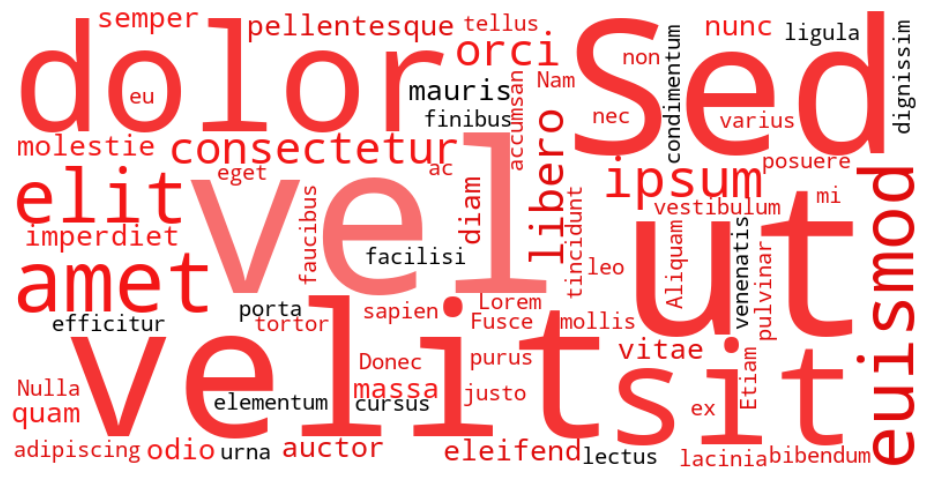

In [73]:
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt

# Define the text for the word cloud
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed vel orci eu sapien lacinia finibus. Sed varius libero vel velit pellentesque, vel pellentesque nunc efficitur. Etiam euismod, elit a consectetur elementum, velit odio imperdiet libero, non vestibulum purus quam ac mauris. Ut vitae leo vel mi bibendum porta. Nulla facilisi. Sed auctor, tellus eget tincidunt dignissim, quam massa pulvinar mauris, sit amet eleifend ex dolor ut velit. Donec auctor molestie ligula, ut accumsan nunc imperdiet ut. Fusce ut ipsum euismod, semper elit vitae, posuere lectus. Aliquam euismod massa sit amet justo eleifend, sed semper orci condimentum. Nam cursus, velit nec molestie venenatis, odio diam faucibus diam, a mollis tortor dolor vel urna."

# Split the text into individual words
words = text.split()

# Calculate the frequency of each word
freq = {}
for word in words:
    freq[word] = freq.get(word, 0) + 1

# Define a custom color function based on word frequency
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    freq_value = freq.get(word)
    if freq_value:
        # Set the saturation to 90% and the lightness to a value between 40% and 70%
        saturation = 90
        lightness = int(40 + (freq_value * 30 / max(freq.values())))
        return f"hsl(0, {saturation}%, {lightness}%)"
    else:
        return "#000000"

# Generate the word cloud with custom colors
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

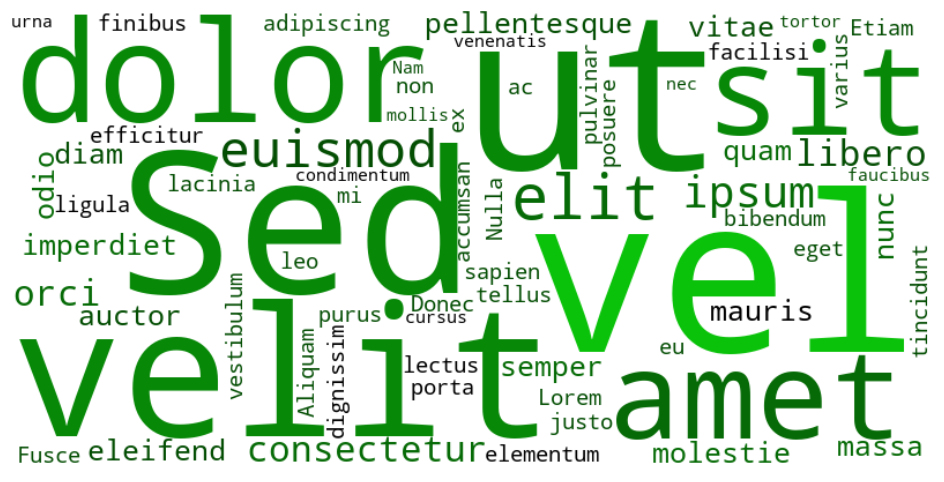

In [74]:
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt

# Define the text for the word cloud
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed vel orci eu sapien lacinia finibus. Sed varius libero vel velit pellentesque, vel pellentesque nunc efficitur. Etiam euismod, elit a consectetur elementum, velit odio imperdiet libero, non vestibulum purus quam ac mauris. Ut vitae leo vel mi bibendum porta. Nulla facilisi. Sed auctor, tellus eget tincidunt dignissim, quam massa pulvinar mauris, sit amet eleifend ex dolor ut velit. Donec auctor molestie ligula, ut accumsan nunc imperdiet ut. Fusce ut ipsum euismod, semper elit vitae, posuere lectus. Aliquam euismod massa sit amet justo eleifend, sed semper orci condimentum. Nam cursus, velit nec molestie venenatis, odio diam faucibus diam, a mollis tortor dolor vel urna."

# Split the text into individual words
words = text.split()

# Calculate the frequency of each word
freq = {}
for word in words:
    freq[word] = freq.get(word, 0) + 1

# Define a custom color function based on word frequency
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    freq_value = freq.get(word)
    if freq_value:
        # Set the saturation to 90% and the lightness to a value between 10% and 60%
        saturation = 90
        lightness = int(10 + (freq_value * 30 / max(freq.values())))
        return f"hsl(120, {saturation}%, {lightness}%)"
    else:
        return "#000000"

# Generate the word cloud with custom colors
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()